# Pass Map Template

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from imageio import imread
from skimage.transform import resize
import math
from math import pi
import scipy.stats
from selenium import webdriver
import warnings
import os

import matplotlib as mpl
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm

import main

from mplsoccer import Pitch, add_image, VerticalPitch, FontManager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap
from urllib.request import urlopen
warnings.filterwarnings('ignore')


# targetDf = pd.read_csv('/work/assets/whoscored/barcelona/match/2021/2021#32.csv')
# teamId = 65
# teamName = 'Barcelona'
# opponentId = targetDf['teamId'][targetDf['teamId'] != teamId][0]
# opponentName = 'Villarreal'

In [2]:
URL3 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
URL4 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
URL5 = 'https://github.com/googlefonts/rubik/tree/main/fonts/ttf/Rubik-Medium.ttf?raw=true'

font_regular2 = FontManager(URL3)
font_regular3 = FontManager(URL5)


# font_bold = FontManager(URL)
# font_label = FontManager(URL)
font_label2 = FontManager(URL4)
pitch_color = '#ededed'
text_color = '#1A1F21'
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)

In [3]:
#Loading the club logo & Arrow
team="Barcelona"
if team == "Barcelona":
    logourl = "https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png"
elif team == opponent:
    logourl= "https://raw.githubusercontent.com/clxrse/open_mod/main/logo.png"

else :
    logourl="Ok"

LOGO_URL = logourl
logo = Image.open(urlopen(LOGO_URL))

if team =="Barcelona":
    League = "La Liga"
elif team =="Arsenal":
    League = "Premier League"
else :
    League = "ok"

Text(0.5, 0.6, 'Barcelona | Sergio Busquets 20/21')

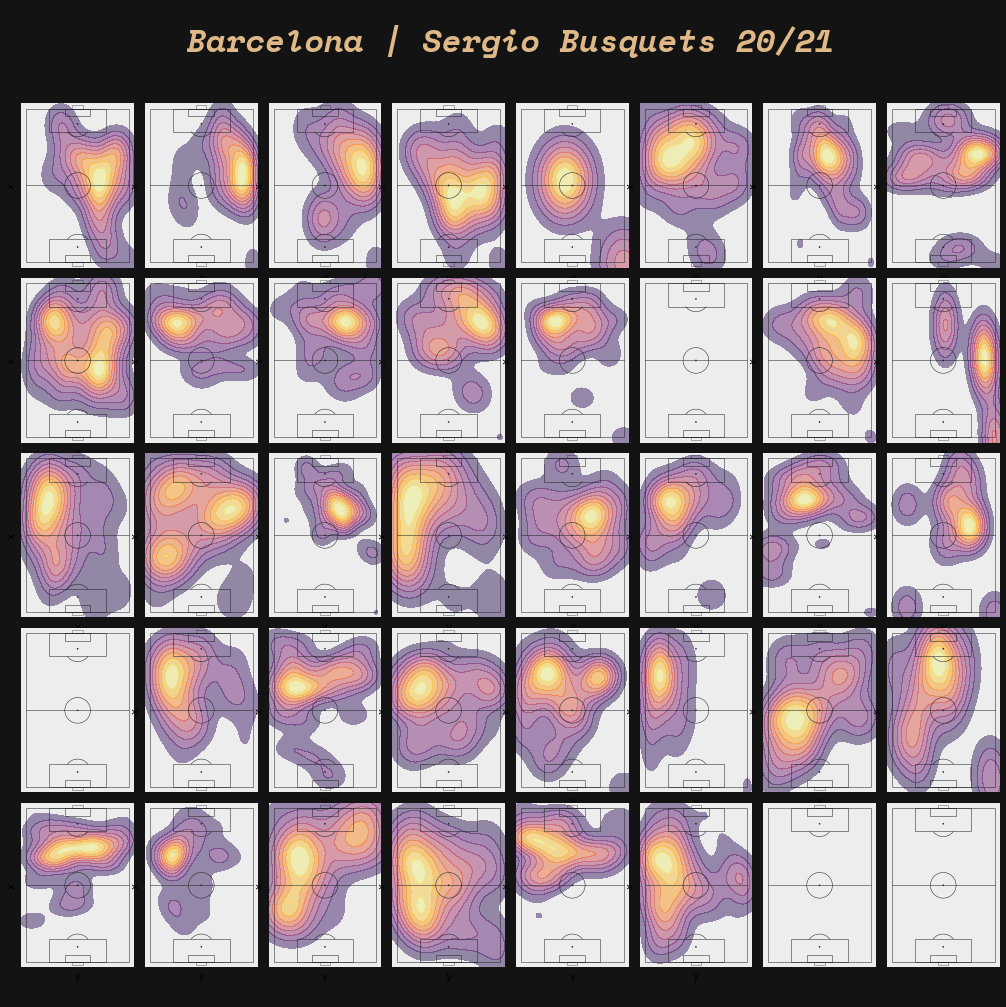

In [6]:
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = '#ededed',
    line_color = '#1A1F21', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
fig, axs = pitch.grid(nrows=5, ncols=8, figheight=15,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.8)

for i in range(5):
    for j in range(8):
        axs['pitch'][i][j].invert_xaxis()

fig.set_facecolor(pitch_color)

teamId = 65
teamName = 'Barcelona'
row=0
col=0
for i in range(38):
    df = pd.read_csv(f'/work/assets/whoscored/barcelona/match/2021/2021#{i}.csv')

    playerId = 80241
    typew = {'value': 1, 'displayName': 'Successful'}
    df = df[(df['playerId']==int(playerId)) & 
            (df['outcomeType.displayName'] == typew['displayName']) & 
            (df['outcomeType.value'] == typew['value'])][['x', 'y', 'endX', 'endY']]
    df['x'] = df['x']*1.2
    df['endX'] =df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist1']=np.sqrt((120-df.x)**2 + (40-df.y)**2)
    df['dist2']=np.sqrt((120-df.endX)**2 + (40-df.endY)**2)
    
            
    kde = sns.kdeplot(
        df['y'],
        df['x'],
        shade=True,
        shade_lowest=False,
        alpha=.45,
        n_lavels=10,
        cmap='inferno',
        ax=axs['pitch'][row][col]
    )
    col+=1
    if col==8:
        row+=1
        col=0
    if row==5:
        break;
        
axs['title'].text(0.5, 0.6, f'Barcelona | Sergio Busquets 20/21' ,color='#DEB887', va='center', ha='center', fontproperties=font_label2.prop, fontsize=32)

        
# plt.savefig(f'/work/output/barcelona/heatb2021.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [38]:
fig, axs = pitch.grid(nrows=5, ncols=8, figheight=15,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.8)

Text(0.1, 0.5, 'data via whoscored')

In [31]:
teamId = 65
teamName = 'Barcelona'
row=0
col=0
for i in range(38):
    df = pd.read_csv(f'/work/assets/whoscored/barcelona/match/2021/2021#{i}.csv')

    playerId = 279423
    typew = {'value': 1, 'displayName': 'Successful'}
    df = df[(df['playerId']==int(playerId)) & 
            (df['outcomeType.displayName'] == typew['displayName']) & 
            (df['outcomeType.value'] == typew['value'])][['x', 'y', 'endX', 'endY']]
    df['x'] = df['x']*1.2
    df['endX'] =df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist1']=np.sqrt((120-df.x)**2 + (40-df.y)**2)
    df['dist2']=np.sqrt((120-df.endX)**2 + (40-df.endY)**2)
    
            
    kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade=True,
        shade_lowest=False,
        alpha=.45,
        n_lavels=10,
        cmap='magma',
        ax=axs['pitch'][row][col]
    )
    col+=1
    if col==8:
        row+=1
        col=0
    if row==5:
        break;
        
    print(i)
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [26]:
# df = df.reset_index()
# for (player_id,player_name), (x,y) in loc_dict.items():
    

# axes[axesNum].set_title(f"{teamName} | Heat Map",color='#DEB887',fontsize=18,fontweight='bold')
axs['pitch'][1]

array([<matplotlib.axes._axes.Axes object at 0x7fed8e608c40>,
      dtype=object)

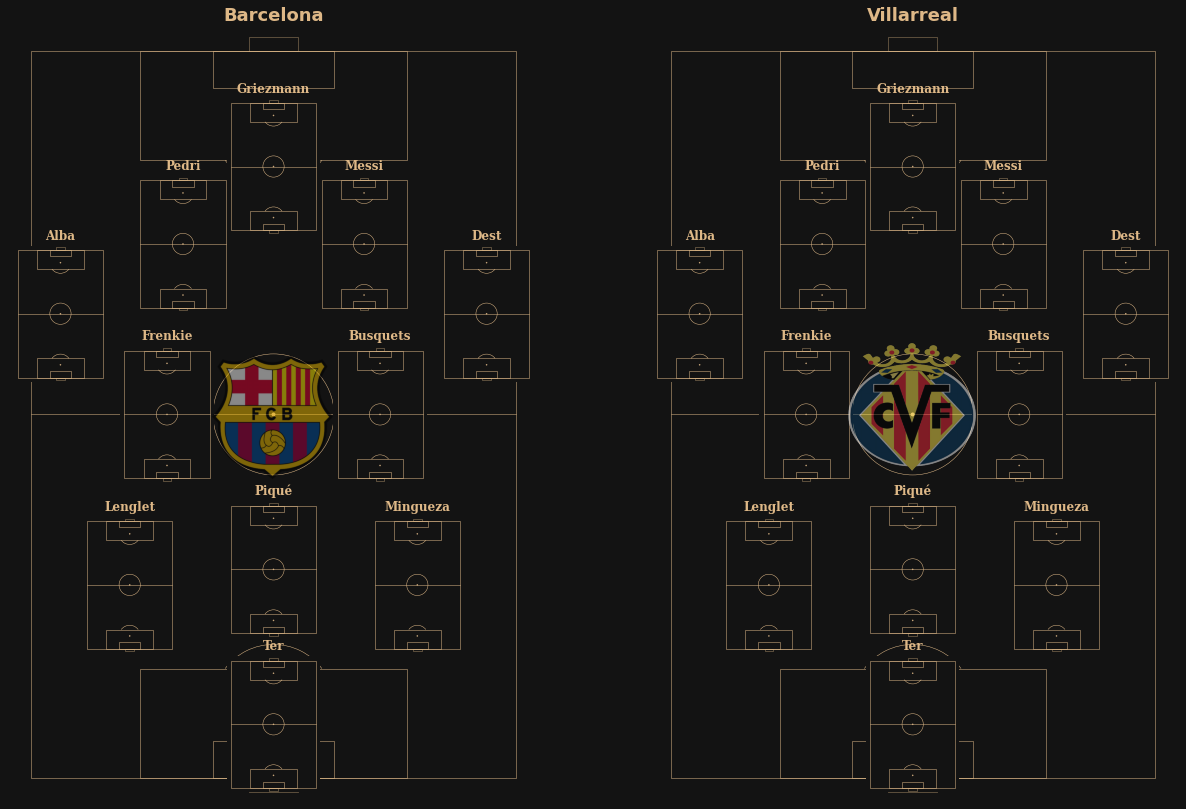

In [156]:
fig, axes = plt.subplots(1,2,figsize=(21,18))
fig.set_facecolor('#131313')
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = '#131313',
    line_color = '#DEB887', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])

im = imread(os.path.join('/work/assets/image/','barcelona_small2.png'))
im = resize(im, (128, 125))
fig.figimage(im, 210, 328, alpha=.5)

im = imread(os.path.join('/work/assets/image/','villarreal-club-de-futbol-logo-DB6A3B38E2-seeklogo.com.png'))
im = resize(im, (128, 128))
fig.figimage(im, 848, 338, alpha=.5)

def plot_inset(axes, pdf, x, y, name):
    pos = inset_axes(axes,width=1.3,height=2.8,loc=10,bbox_to_anchor=(x,y),bbox_transform=axes.transAxes,borderpad=0.0) 
    pos.set_title(name,color='#DEB887',fontweight='bold',fontsize=12,fontname='serif')
    pitch.draw(ax=pos)

def plotmap(targetDf, teamId,teamName,axesNum):
    df = targetDf
    df = df[df['teamId']==teamId]
    
    for (player_id,player_name), (x,y) in loc_dict.items():
        player_df = df[df['playerId']==player_id]
        plot_inset(axes=axes[axesNum], pdf=player_df, x=x, y=y,name=player_name)

    axes[axesNum].set_title(f"{teamName}",color='#DEB887',fontsize=18,fontweight='bold')

plotmap(targetDf,teamId,teamName,0)
plotmap(targetDf,opponentId,opponentName,1)
    

In [4]:
def plot_inset(axes, pdf, x, y, name):
    pos = inset_axes(axes,width=1.3,height=2.8,loc=10,bbox_to_anchor=(x,y),bbox_transform=axes.transAxes,borderpad=0.0) 
    pos.set_title(name,color='#DEB887',fontweight='bold',fontsize=12,fontname='serif')
    kde = sns.kdeplot(
        pdf['y'],
        pdf['x'],
        shade=True,
        shade_lowest=False,
        alpha=.35,
        n_lavels=10,
        cmap='nipy_spectral',
        ax=pos
)  
    pitch.draw(ax=pos)
    pos.invert_xaxis()
    return pos

Text(-0.5, -4.9, 'Data via whoscored.com / Created by @Bucciaratimes')

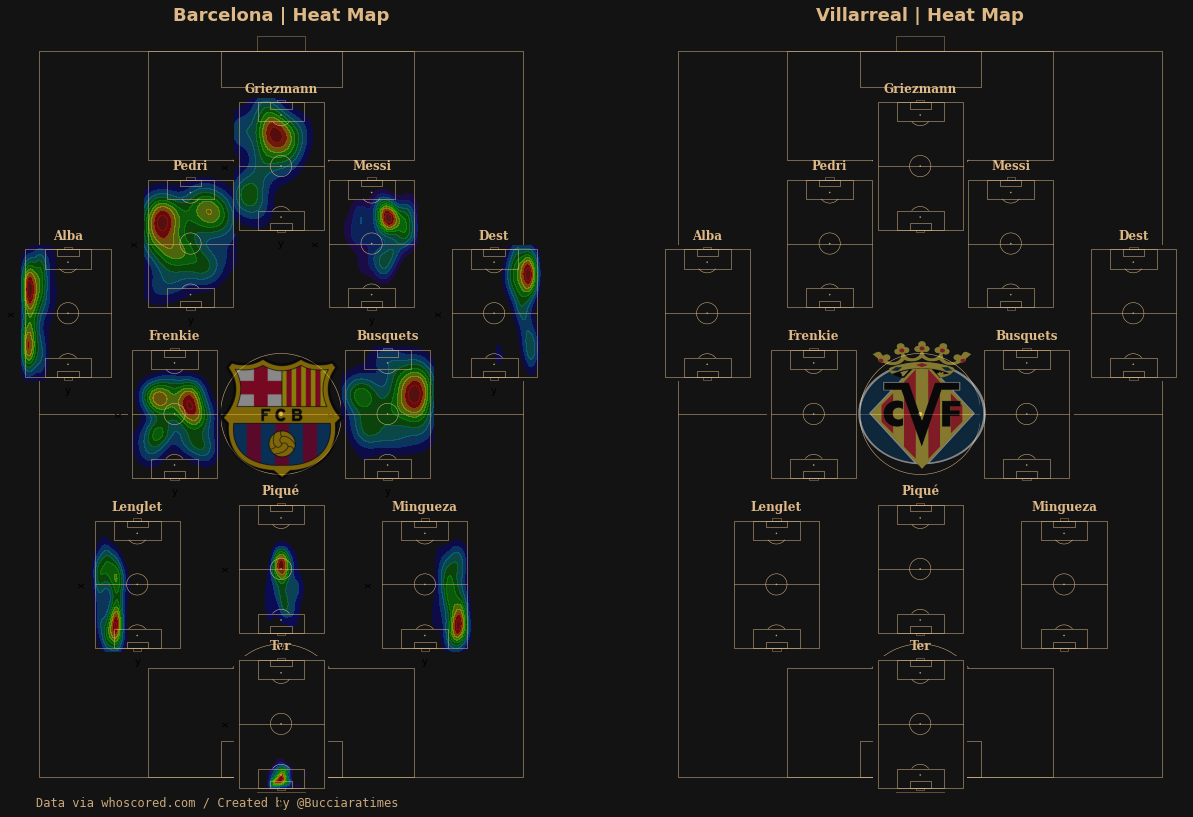

In [143]:
fig, axes = plt.subplots(1,2,figsize=(21,18))
fig.set_facecolor('#131313')
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = '#131313',
    line_color = '#DEB887', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])

im = imread(os.path.join('/work/assets/image/','barcelona_small2.png'))
im = resize(im, (128, 128))
fig.figimage(im, 218, 335, alpha=.5)

im = imread(os.path.join('/work/assets/image/','villarreal-club-de-futbol-logo-DB6A3B38E2-seeklogo.com.png'))
im = resize(im, (128, 128))
fig.figimage(im, 858, 348, alpha=.5)

# image = Image.open('/work/assets/image/barcelona_small2.png')
# image.putalpha(50)
# ax_image = fig.add_axes((0.463, 0.45, 0.1, 0.1))
# ax_image.axis('off')
# ax_image.imshow(image)

def plotHeatmap(targetDf, teamId,teamName,axesNum):
    df = targetDf
    df = df[df['teamId']==teamId]
    passesdf = df[df['type.value']==1]
    passesdf['playerId'] = passesdf['playerId'].astype('int')

    df = passesdf
    df = df.reset_index()

    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8

    for (player_id,player_name), (x,y) in loc_dict.items():
        player_df = df[df['playerId']==player_id]
        plot_inset(axes=axes[axesNum], pdf=player_df, x=x, y=y,name=player_name)

    axes[axesNum].set_title(f"{teamName} | Heat Map",color='#DEB887',fontsize=18,fontweight='bold')
    
plotHeatmap(targetDf,teamId,teamName,0)
plotHeatmap(targetDf,opponentId,opponentName,1)
    
    
axes[0].text(-.5,-4.9,"Data via whoscored.com / Created by @Bucciaratimes", color='#DEB887',
               fontsize=12, alpha=0.9, zorder=1,fontname='monospace')


In [33]:
loc_dict = { # 3421
    (80774,'Ter'):(.5, .1),# GK
    (379205,'Dest'):(.9,.63),# RSB
    (44288,'Alba'):(.1,.63),# LSB
    (397469,'Mingueza'):(.77,.28),# RCB
    (236511,'Lenglet'):(.23,.28),# LCB
#     (384711,'Araujo'):(.5,.3),# CB
    (12712,'Piqué'):(.5,.3),# CB
    (279423,'Busquets'):(.7,.5),# RCM
    (44721,'Frenkie'):(.3,.5),# LCM
    (11119,'Messi'):(.67,.72),# RCAM
    (402197,'Pedri'):(.33,.72),# LCAM
#     (299513,'Dembele'):(.5, .82)# CF
    (80241,'Griezmann'):(.5, .82)# CF
}


# 4231PSG
# loc_dict = { 
#     (65901,'Keylor Navas'):(.5, .1),
#     (361283,'Colin Dagba'):(.9,.33),
#     (247800,'Presnel Kimpembe'):(.33,.23),
#     (94891,'Danilo Pereira'):(.67,.23),
#     (248112,'Abdou Diallo'):(.1,.33),
#     (93700,'Leandro Paredes'):(.37,.44),
#     (80464,'Idrissa Gueye'):(.63,.44),
#     (23110,'Ángel Di María'):(.87,.72),
#     (50835,'Neymar'):(.5,.64),
#     (96449,'Julian Draxler'):(.13,.72),
#     (300713,'Kylian Mbappé'):(.5, .85),
#     (328990,'Moise Kean'):(.5, .82),
#     (352830,'Mitchel Bakker'),
#     (71174,'Ander Herrera'),
#     (106590,'Rafinha'):(.9,.63),
#     (255167,'Thilo Kehrer'):(.9,.63),
#     (101596,'Alessandro Florenzi'):(.9,.63),
#     (91961,'Marco Verratti'):(.37,.5),
#     (94868,'Pablo Sarabia'),
#     (109338,'Sergio Rico'),
#     (399773,'Timothee Pembele'),
#     (413185,'Kenny Nagera'),
#     (413478,'Yanis Saidani' )
# }


Text(-0.5, -4.9, 'Data via whoscored.com / Created by @Bucciaratimes')

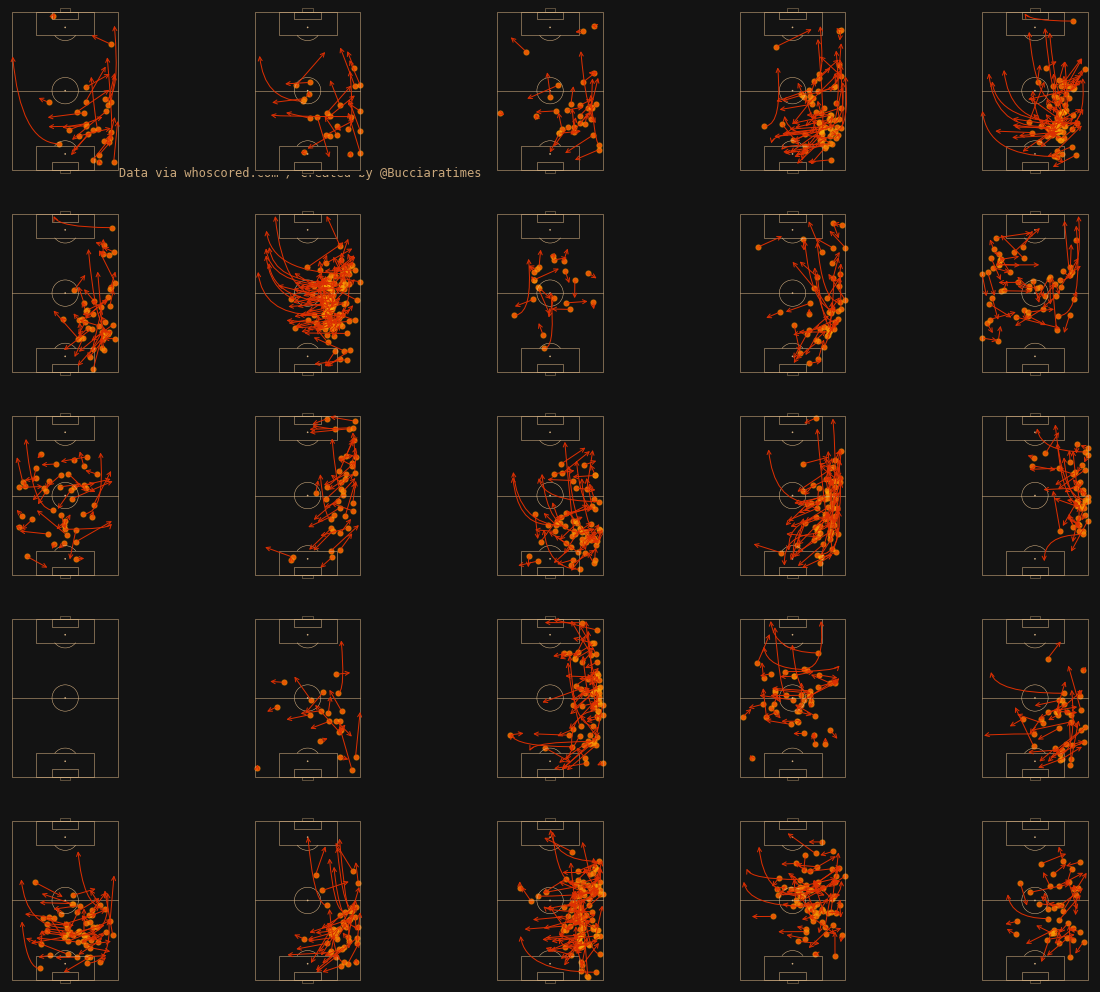

In [4]:


def plotPassmap(fig, ax, df, teamName, playerId, axesNum, sumrb=0):
    df["x"] = df["x"]*1.2
    df["y"] = df["y"]*.8
    df["endX"] = df["endX"]*1.2 
    df["endY"] = df["endY"]*.8 
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
    pass_df = df[df['type.value']==1]
    pass_df['playerId'] = pass_df['playerId'].astype('int')
    pass_df = pass_df[pass_df["playerId"]==playerId]
    
    ##### if pickup player 
#     df["receiverId"] = df["playerId"].shift(-1)    
#     df.dropna(subset=["receiverId"],inplace=True)  
#     df = df[df["playerId"]==playerId]
#     sumrb += len(df[(df["receiverId"]==386979)|(df["receiverId"]==110290)])  
#     df = df[(df["receiverId"]==386979)|(df["receiverId"]==110290)]
    ######
    x = pass_df['x']
    y = pass_df['y']
    endX = pass_df['endX']
    endY = pass_df['endY']
#     ax[axesNum].plot(y,x,endY,endX,color="white",linestyle = "dotted")
    ax[axesNum].scatter(y,x,color="#dc2f02",s=25)  
    ax[axesNum].scatter(y,x,color="#ffba08",s=28,alpha=.3)   
    
#     for index, row in df.iterrows():
#         ax[axesNum].annotate("",
#        xy=(row['endY'], row['endX']),xytext=(row["y"],row["x"]),
#        arrowprops={'arrowstyle':"-",
#                    'fc':'#00CC99',
#                    'ec':'dodgerblue',
#                    "lineWidth":3,
#                     "connectionstyle":"arc, angleA = 0, angleB = 95"
# #                                    "connectionstyle":"arc, angleA = 90, angleB = 0"

#                   },
#       )
    
    for index, row in pass_df.iterrows():
        
        if row["outcomeType.displayName"] != "Successful":
            edgeColor = "#13B9D6"
        else:
            edgeColor = "#D61327"
        if row["dist"] > 36.57:
            ax[axesNum].annotate("",
                   xy=(row['endY'], row['endX']),xytext=(row["y"],row["x"]),
                   arrowprops={'arrowstyle':"->",
                               'fc':'#00CC99',
                               'ec':edgeColor,
                                "connectionstyle":"angle3, angleA = 0, angleB = 95"
#                                    "connectionstyle":"arc, angleA = 90, angleB = 0"

                              },
                  )
        else:
            ax[axesNum].annotate("",
                           xy=(row['endY'], row['endX']),xytext=(row["y"],row["x"]),
    #                        arrowprops=dict(arrowstyle='<|-|>', linewidth=width, color=line_color, alpha=.88))
                           arrowprops={'arrowstyle':"->",
                                       'fc':'#00CC99',
                                       'ec':edgeColor,
    #                                 "connectionstyle":"angle3, angleA = 0, angleB = 95"
    #                                    "connectionstyle":"arc, angleA = 90, angleB = 0"

                                      },
                          )
    try:
#         ax[axesNum].set_title(f"{np.floor(sumrb/len(pass_df)*100)}%",fontsize=18)
        sucLen = len(pass_df[pass_df["outcomeType.displayName"]=="Successful"])
        ax[axesNum].set_title(f"{np.floor(sucLen/len(pass_df) * 100 )}%",fontsize=18,color="#ededed")

    except:
        pass
    
def plotHeatmap(fig, ax, df, teamName, playerId, axesNum, sumrb=0, cmap=None):

    typew = {'value': 1, 'displayName': 'Successful'}
    df = df[(df['playerId']==int(playerId)) & 
#             (df['outcomeType.displayName'] == typew['displayName']) & 
            (df['type.value'] == typew['value'])][['x', 'y', 'endX', 'endY']]
    df['x'] = df['x']*1.2
    df['endX'] =df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist1']=np.sqrt((120-df.x)**2 + (40-df.y)**2)
    df['dist2']=np.sqrt((120-df.endX)**2 + (40-df.endY)**2)
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
            
    kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade=True,
        shade_lowest=False,
        alpha=.45,
        n_lavels=10,
        cmap=cmap,
        ax=ax[axesNum]
    )


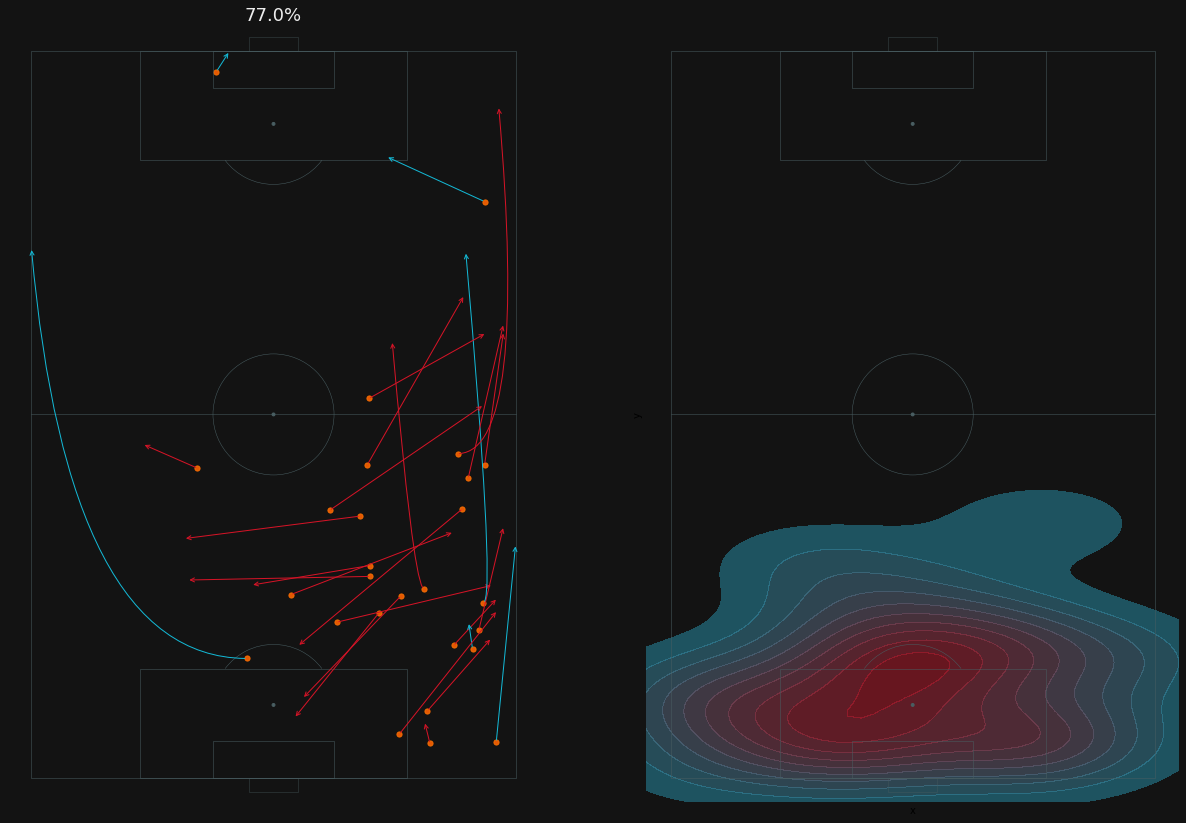

In [5]:
fig, axes = plt.subplots(1,2,figsize=(21,18))
fig.set_facecolor('#131313')
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = '#131313',
    line_color = '#495E62', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])

axes[0].invert_xaxis()


df = pd.read_csv("/work/assets/whoscored/brighton/match/2021/2021#0.csv")

# fig.suptitle("Ben White -> RB,RWB")

cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#D61327"])

plotPassmap(fig, axes, df, teamName="brighton", playerId=322036, axesNum=0)
plotHeatmap(fig, axes, df, teamName="brighton", playerId=322036, axesNum=1, cmap=cmap)

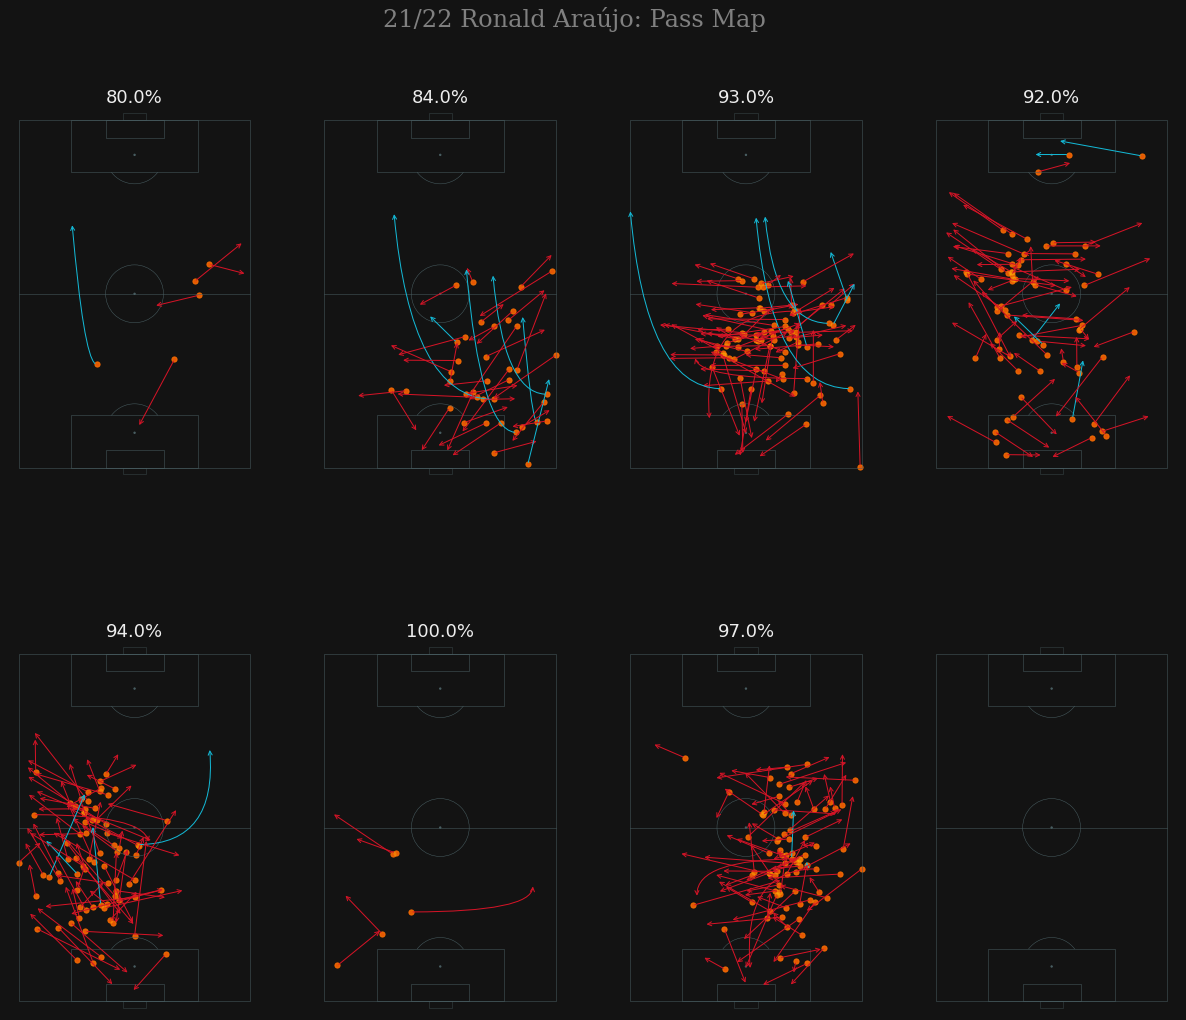

In [14]:
fig, axes = plt.subplots(2,4,figsize=(21,18))
fig.set_facecolor('#131313')
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = '#131313',
    line_color = '#495E62', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
axes = axes.ravel()
c = 0
for i in range(8):
    pitch.draw(ax=axes[i])
    axes[i].invert_xaxis()
    if i == 15 | i == 30:
        c += 1
counter = 1
newI = 0
for i in range(1,8):
    df = pd.read_csv(f"/work/assets/whoscored/barcelona/match/2122/eventsData/2122#{i}.csv")
    playerId = 384711
    if not playerId in df["playerId"].unique():
        counter += 1
        continue
    i -= counter
    plotPassmap(fig, axes, df, teamName="brighton", playerId=playerId, axesNum=i)

    
# fig.text("Data via whoscored.com / Created by @Bucciaratimes", color='#DEB887',
#                fontsize=12, alpha=0.9, zorder=1,fontname='monospace')

fig.suptitle("21/22 Ronald Araújo: Pass Map",y=.93, fontsize=24, color="gray", fontname="serif")

plt.savefig(f'/work/output/2222.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [15]:
df = pd.read_csv(f"/work/assets/whoscored/brighton/match/2021/2021#0.csv")
df = df[df["type.value"]==1]
df["receiverId"] = df["playerId"].shift(-1)

In [9]:
df.dropna(subset=["receiverId"],inplace=True)

In [90]:
playerId = input("Enter player Id(please use accented characters where needed:")
team = input("Enter Player's team name:")
dfs =[]
for i in range(15):
    df = pd.read_csv(f'/work/assets/whoscored/{team}/match/2021/2021#{i}.csv')
    dfs.append(df)
    
df1 = pd.concat(dfs)
print(len(df1))

dfs2 =[]
for i in range(15,38):
    df = pd.read_csv(f'/work/assets/whoscored/{team}/match/2021/2021#{i}.csv')
    dfs2.append(df)
    
df2 = pd.concat(dfs2)
print(len(df2))

typew = {'value': 1, 'displayName': 'Successful'}

df1 = df1[(df1['playerId']==int(playerId)) & 
        (df1['outcomeType.displayName'] == typew['displayName']) & 
        (df1['outcomeType.value'] == typew['value'])][['x', 'y', 'endX', 'endY']]
print(len(df1))

df1['x'] = df1['x']*1.2
df1['endX'] =df1['endX']*1.2
df1['y']=df1['y']*0.8
df1['endY']=df1['endY']*0.8

try:
    df2 = df2[(df2['playerId']==int(playerId)) & 
            (df2['outcomeType.displayName'] == typew['displayName']) & 
            (df2['outcomeType.value'] == typew['value'])][['x', 'y', 'endX', 'endY']]
except:
    df2 = df2[(df2['playerId']==int(playerId)) & 
            (df[df["type"] == "{'value': 1, 'displayName': 'Successful'}"]) & 
            (df2[df2["type"] == "{'value': 1, 'displayName': 'Pass'}"])][['x', 'y', 'endX', 'endY']]
print(len(df2))

df2['x'] = df2['x']*1.2
df2['endX'] =df2['endX']*1.2
df2['y']=df2['y']*0.8
df2['endY']=df2['endY']*0.8

# passAc = df
# passBc = df
# passCc = df
# passAc = passAc.append(passBc)
# passAc = passAc.append(passCc)

# passAc2 = df2
# passBc2 = df2
# passCc2 = df2
# passAc2 = passAc2.append(passBc2)
# passAc2 = passAc2.append(passCc2)

Enter player Id(please use accented characters where needed: 80241
Enter Player's team name: Barcelona


24968
38553
576
1018


In [13]:
#Loading Some Fonts
URL = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Bold.ttf?raw=true'
URL2 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Light.ttf?raw=true'
URL3 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
URL4 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
URL5 = 'https://github.com/googlefonts/rubik/tree/main/fonts/ttf/Rubik-Medium.ttf?raw=true'

# font_regular = FontManager(URL2)
font_regular2 = FontManager(URL3)
font_regular3 = FontManager(URL5)


# font_bold = FontManager(URL)
# font_label = FontManager(URL)
font_label2 = FontManager(URL4)

pitch_color = '#ededed'
text_color = '#1A1F21'
oneColor = '#B94B5F'
theOtherColor = '#4A5EB8'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)

pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitch_color,
    line_color = '#495E62', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)

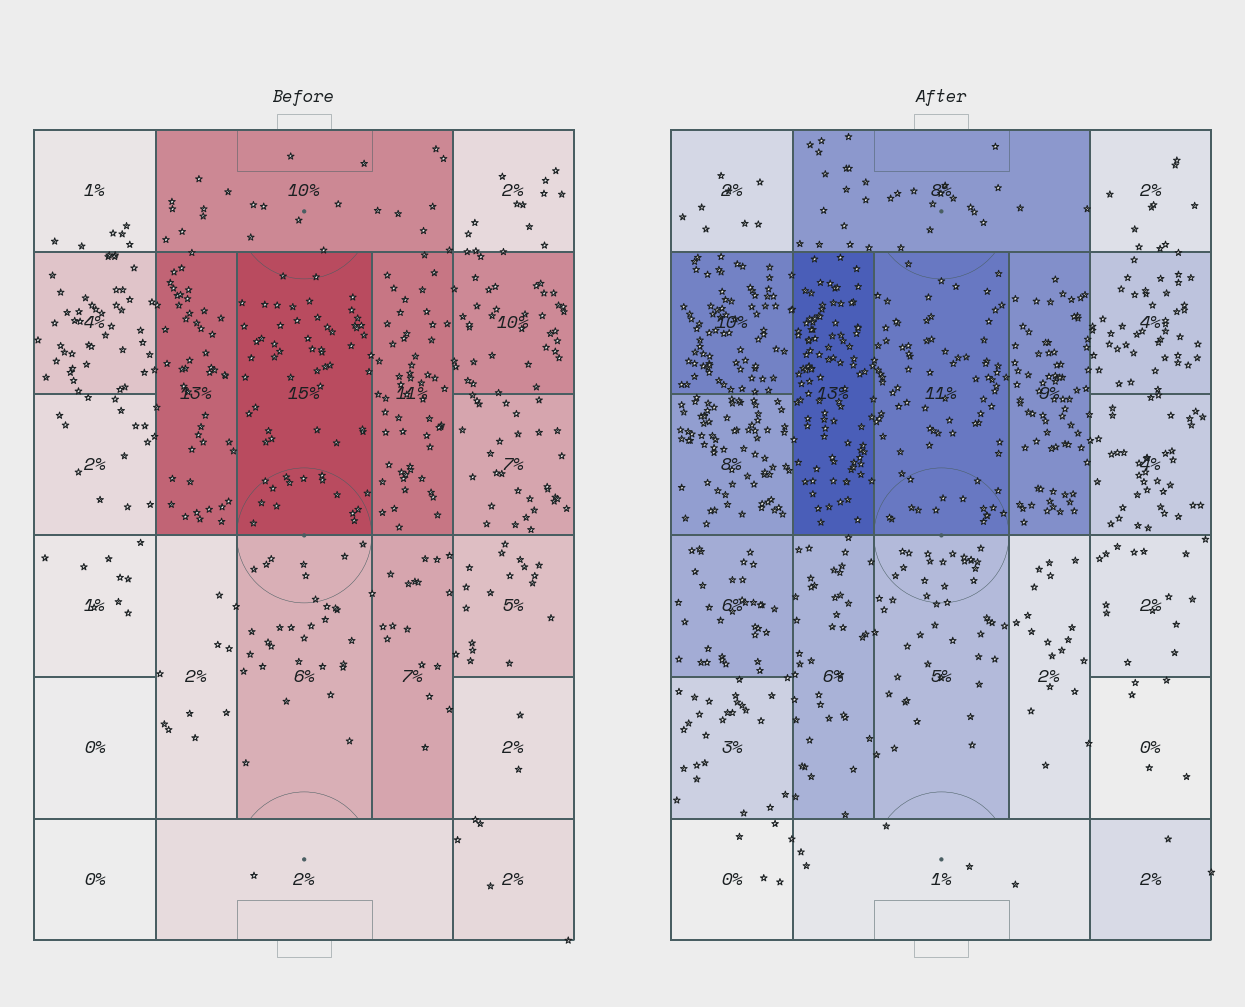

In [92]:
fig, axs = pitch.grid(nrows=1, ncols=2, figheight=15,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.8)

axs['pitch'][0].invert_xaxis()
axs['pitch'][1].invert_xaxis()

fig.set_facecolor("#ededed")

#plot for jorginho

scatter1 = pitch.scatter(df1.endX,df1.endY,color=pitch_color,ax=axs['pitch'][0],zorder=3,ec=text_color,lw=1,s=50,hatch="//"*3,fc="#ededed",marker="*")

bin_statistic1 = pitch.bin_statistic_positional(df1.x, df1.y, statistic='count',
                                               positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic1, ax=axs['pitch'][0],
                         cmap=cmapA, edgecolors='#495E62',alpha=1, linewidth=.05)

labels1 = pitch.label_heatmap(bin_statistic1, color=text_color, fontsize=18,
                             ax=axs['pitch'][0], ha='center', va='center',
                             str_format='{:.0%}',fontproperties=font_regular2.prop)

scatter2 = pitch.scatter(df2.endX,df2.endY,color=pitch_color,ax=axs['pitch'][1],zorder=3,ec=text_color,lw=1,s=50,hatch="//"*3,fc="#ededed",marker="*")

bin_statistic2 = pitch.bin_statistic_positional(df2.x, df2.y, statistic='count',
                                               positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic2, ax=axs['pitch'][1],
                         cmap=cmapB, edgecolors='#495E62',alpha=1, linewidth=.05)

labels2 = pitch.label_heatmap(bin_statistic2, color=text_color, fontsize=18,
                             ax=axs['pitch'][1], ha='center', va='center',
                             str_format='{:.0%}',fontproperties=font_regular2.prop)



# from highlight_text import ax_text

# axs['title'].text(0.5, 0.7,  f'{playerName} vs {playerName} : Progressive Passing', color='#000009',va='center', ha='center', fontproperties=font_bold.prop, fontsize=25)

# playerName = 'Frenkie de Jong'
# season = '19/20'

# axs['title'].text(0.5, 0.6, f'FC Barcelona {season} | {playerName}', color='#ffffff', va='center', ha='center', fontproperties=font_label2.prop, fontsize=22)

# axs['pitch'][0].text(40,125,f'Progressive passes({len(passAc)})',color=text_color, va='center', ha='center', fontproperties=font_regular2.prop,fontsize=17)
axs['pitch'][0].text(40,125,f'Before', color=text_color, va='center', ha='center', fontproperties=font_regular2.prop,fontsize=17)

axs['pitch'][1].text(40,125,f'After', color=text_color, va='center', ha='center', fontproperties=font_regular2.prop,fontsize=17)

# axs['pitch'][0].text(40,130,f'{playerName}: Progressive passes(121)', color=text_color,va='center',ha='center', fontproperties=font_label.prop,fontsize=14)

# axs['pitch'][1].text(40,130,f'{playerName}: Pass Area', color=text_color, va='center', ha='center', fontproperties=font_label.prop,fontsize=14)

# axs['endnote'].text(1, 0.5, "viz made by @Bucciaratimes", va='center', ha='right', fontsize=40, fontproperties=font_label2.prop,color=text_color)
# axs['endnote'].text(0.1, 0.5, "data via whoscored", va='center', ha='right', fontsize=40, fontproperties=font_label2.prop,color=text_color)

# ax_logo = add_image(logo,fig,left=0.25,bottom=.89,height=0.07)

# logo2 = Image.open("/work/assets/image/ajax.png")
# ax_logo = add_image(logo2,fig,left=0.08,bottom=.89,height=0.07)

plt.savefig(f'/work/output/barcelona/griezBeAf.png', dpi=200, bbox_inches="tight",facecolor='#ededed')

In [32]:
len(df2)

1056

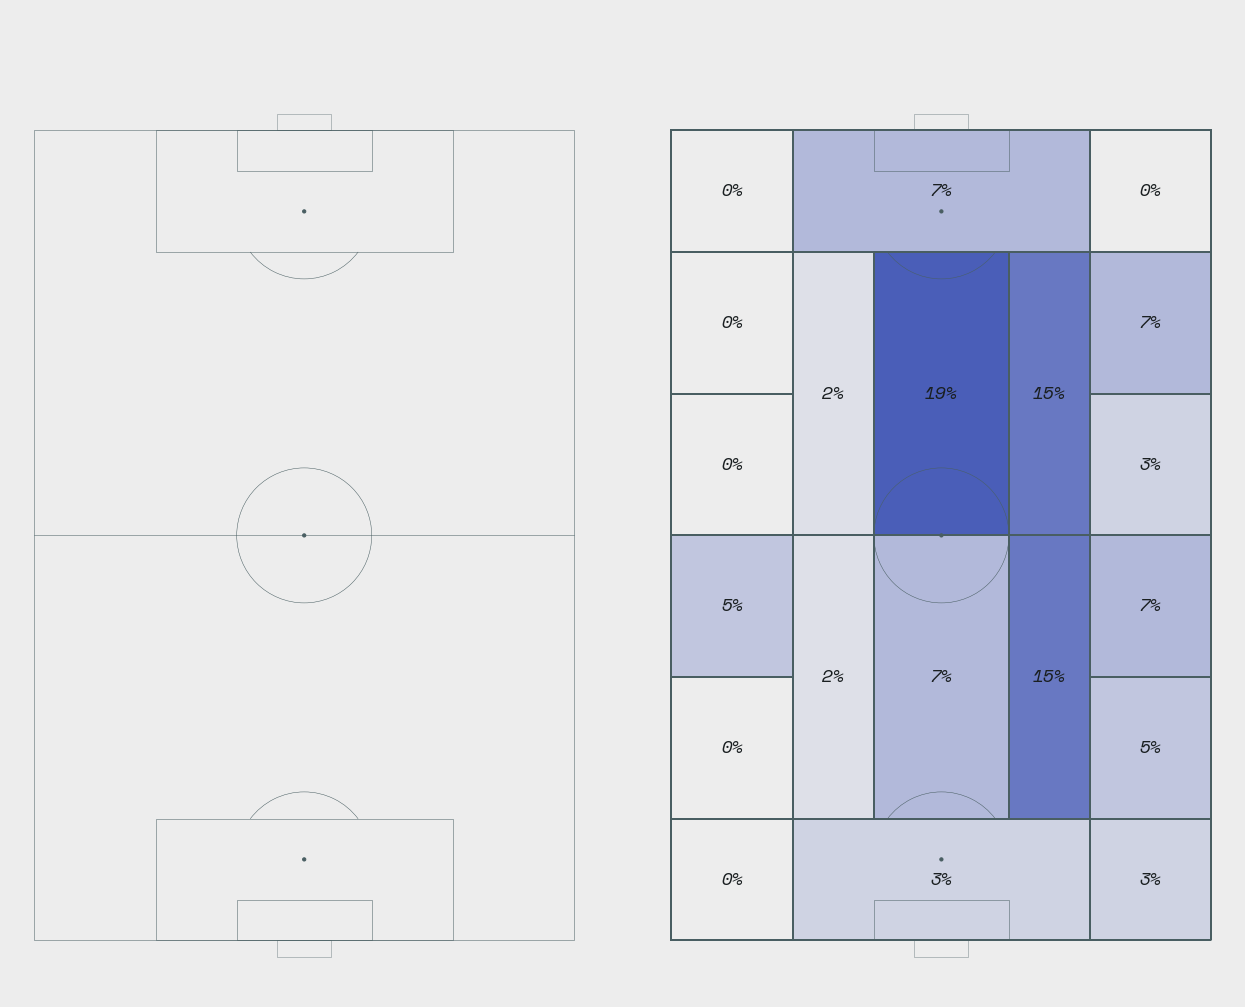

In [67]:
fig, axs = pitch.grid(nrows=1, ncols=2, figheight=15,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.8)

# axs['pitch'][0].invert_xaxis()
axs['pitch'][1].invert_xaxis()

fig.set_facecolor("#ededed")

#plot for jorginho

# Lines2 = pitch.lines(xstart=df2.x,ystart=df2.y,xend=df2.endX,yend=df2.endY,cmap=cmapA,comet=True,lw=2.5,ax=axs['pitch'][0])
# scatter2 = pitch.scatter(df2.endX,df2.endY,color=pitch_color,ax=axs['pitch'][0],zorder=3,ec=text_color,lw=1,s=50,hatch="//"*3,fc="#ededed",marker="*")

# scatter1 = pitch.scatter(df.endX,df.endY,color=pitch_color,ax=axs['pitch'][0],zorder=3,ec=text_color,lw=1,s=50,hatch="//"*3,fc="#ededed",marker="*")

# bin_statistic1 = pitch.bin_statistic_positional(df.x, df.y, statistic='count',
#                                                positional='full', normalize=True)

# pitch.heatmap_positional(bin_statistic1, ax=axs['pitch'][0],
#                          cmap=cmapA, edgecolors='#495E62',alpha=1, linewidth=.05)

# labels1 = pitch.label_heatmap(bin_statistic1, color=text_color, fontsize=18,
#                              ax=axs['pitch'][0], ha='center', va='center',
#                              str_format='{:.0%}',fontproperties=font_regular2.prop)



# scatter2 = pitch.scatter(df2.endX,df2.endY,color=pitch_color,ax=axs['pitch'][1],zorder=3,ec=text_color,lw=1,s=50,hatch="//"*3,fc="#ededed",marker="*")

bin_statistic2 = pitch.bin_statistic_positional(df2.x, df2.y, statistic='count',
                                               positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic2, ax=axs['pitch'][1],
                         cmap=cmapB, edgecolors='#495E62',alpha=1, linewidth=.05)

labels2 = pitch.label_heatmap(bin_statistic2, color=text_color, fontsize=18,
                             ax=axs['pitch'][1], ha='center', va='center',
                             str_format='{:.0%}',fontproperties=font_regular2.prop)



# from highlight_text import ax_text

# axs['title'].text(0.5, 0.7,  f'{playerName} vs {playerName} : Progressive Passing', color='#000009',va='center', ha='center', fontproperties=font_bold.prop, fontsize=25)

# playerName = 'Frenkie de Jong'
# season = '19/20'

# axs['title'].text(0.5, 0.6, f'FC Barcelona {season} | {playerName}', color='#ffffff', va='center', ha='center', fontproperties=font_label2.prop, fontsize=22)

# axs['pitch'][0].text(40,125,f'Progressive passes({len(passAc)})',color=text_color, va='center', ha='center', fontproperties=font_regular2.prop,fontsize=17)
# axs['pitch'][0].text(40,125,f'Before', color=text_color, va='center', ha='center', fontproperties=font_regular2.prop,fontsize=17)

# axs['pitch'][1].text(40,125,f'After', color=text_color, va='center', ha='center', fontproperties=font_regular2.prop,fontsize=17)

# axs['pitch'][0].text(40,130,f'{playerName}: Progressive passes(121)', color=text_color,va='center',ha='center', fontproperties=font_label.prop,fontsize=14)

# axs['pitch'][1].text(40,130,f'{playerName}: Pass Area', color=text_color, va='center', ha='center', fontproperties=font_label.prop,fontsize=14)

# axs['endnote'].text(1, 0.5, "viz made by @Bucciaratimes", va='center', ha='right', fontsize=40, fontproperties=font_label2.prop,color=text_color)
# axs['endnote'].text(0.1, 0.5, "data via whoscored", va='center', ha='right', fontsize=40, fontproperties=font_label2.prop,color=text_color)

# ax_logo = add_image(logo,fig,left=0.25,bottom=.89,height=0.07)

# logo2 = Image.open("/work/assets/image/ajax.png")
# ax_logo = add_image(logo2,fig,left=0.08,bottom=.89,height=0.07)

plt.savefig(f'/work/output/barcelona/griezBeAf2.png', dpi=200, bbox_inches="tight",facecolor='#ededed')